In [ ]:
from google.colab import files
upload = files.upload()

Saving Churn_Modelling.csv to Churn_Modelling.csv


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

**IMPORTING THE DATASET**

In [ ]:
data = pd.read_csv('Churn_Modelling.csv')

**VISUALISATIONS**

In [ ]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
data.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


Removing unnecessary columns

In [ ]:
data.drop('RowNumber',axis='columns',inplace=True)
data.drop('CustomerId',axis='columns',inplace=True)
data.drop('Surname',axis='columns',inplace=True)

Exited and Non Exited Data

In [ ]:
Not_Exited = data[data.Exited==0]
Exited=data[data.Exited==1]
Not_Exited.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,7963.000000,7963.000000,7963.000000,7963.000000,7963.000000,7963.000000,7963.000000,7963.000000,7963.0
mean,651.853196,37.408389,5.033279,72745.296779,1.544267,0.707146,0.554565,99738.391772,0.0
std,95.653837,10.125363,2.880658,62848.040701,0.509536,0.455101,0.497045,57405.586966,0.0
min,405.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,90.070000,0.0
25%,585.000000,31.000000,3.000000,0.000000,1.000000,0.000000,0.000000,50783.490000,0.0
50%,653.000000,36.000000,5.000000,92072.680000,2.000000,1.000000,1.000000,99645.040000,0.0
75%,718.000000,41.000000,7.000000,126410.280000,2.000000,1.000000,1.000000,148609.955000,0.0
max,850.000000,92.000000,10.000000,221532.800000,3.000000,1.000000,1.000000,199992.480000,0.0


In [ ]:
Exited.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,2037.000000,2037.000000,2037.000000,2037.000000,2037.000000,2037.000000,2037.000000,2037.000000,2037.0
mean,645.351497,44.837997,4.932744,91108.539337,1.475209,0.699067,0.360825,101465.677531,1.0
std,100.321503,9.761562,2.936106,58360.794816,0.801521,0.458776,0.480358,57912.418071,0.0
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,1.0
25%,578.000000,38.000000,2.000000,38340.020000,1.000000,0.000000,0.000000,51907.720000,1.0
50%,646.000000,45.000000,5.000000,109349.290000,1.000000,1.000000,0.000000,102460.840000,1.0
75%,716.000000,51.000000,8.000000,131433.330000,2.000000,1.000000,1.000000,152422.910000,1.0
max,850.000000,84.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199808.100000,1.0


[]

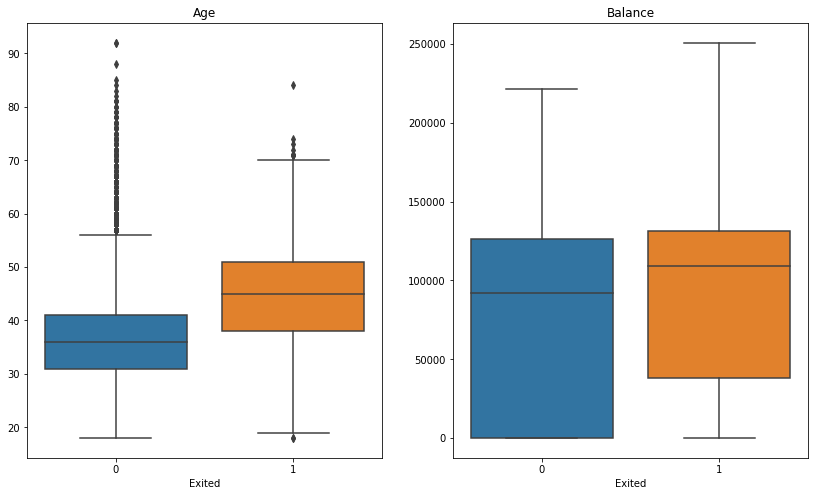

In [ ]:
fig, axes = plt.subplots(1,2,figsize=(14,8))
valid_col = ['Age', 'Balance']
for i, ax in enumerate(axes.flatten()):
    if i == 5:
        ax.axis('off')
        break
    sns.boxplot(x='Exited', y=valid_col[i], data=data, ax=ax)
    ax.set_ylabel(None)
    ax.set_title(label=valid_col[i])
plt.plot()

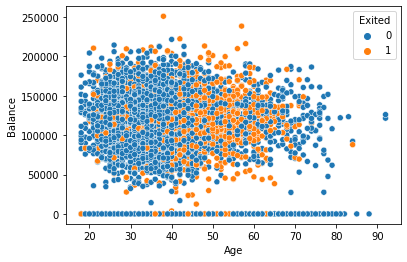

In [ ]:
sns.scatterplot(data=data, x="Age", y="Balance", hue="Exited")

**Univariate Analysis**

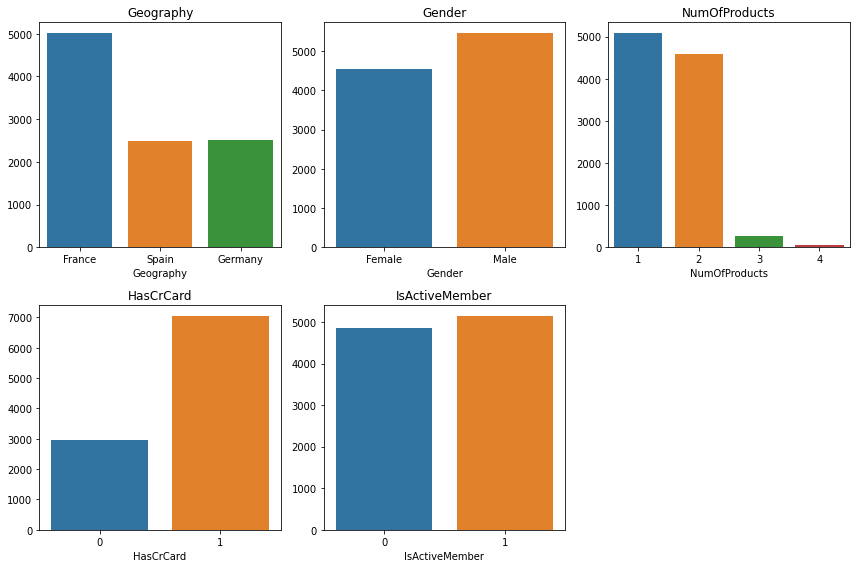

In [ ]:
fig, axes = plt.subplots(2,3,figsize=(12,8))
valid_col =['Geography', 'Gender',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember']
for i, ax in enumerate(axes.flatten()):
    if i == 5:
        ax.axis('off')
        break
    sns.countplot(data= data, x=valid_col[i], ax=ax)
    ax.set_ylabel(None)
    ax.set_title(label=valid_col[i])
plt.tight_layout()

In [ ]:
data['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

The dataset is imbalanced. Most members are from France. The male members are more than female. Most of them avail 1/2 products. Most of them own a credit card.

**Bivariate Analysis**

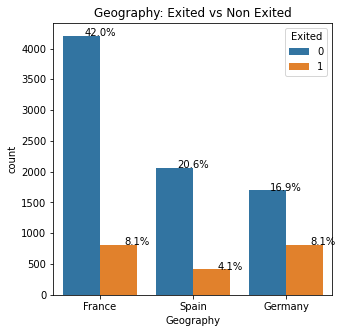

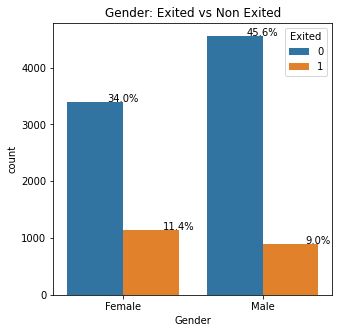

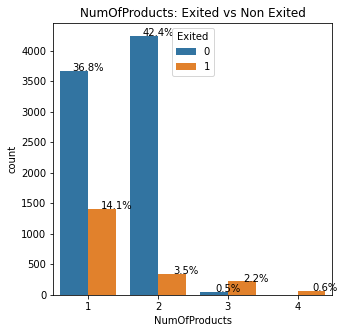

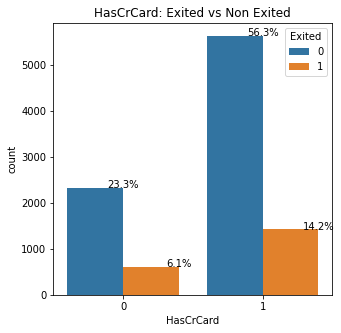

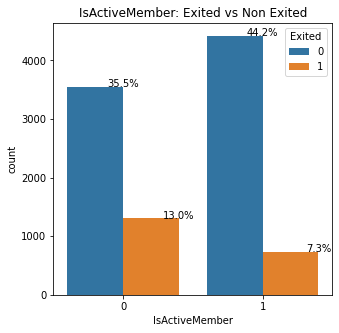

In [ ]:
total=float(len(data))

Excepted_col=['Tenure','Age','CreditScore','Balance',"EstimatedSalary"]
Accepted_col=['Geography', 'Gender','NumOfProducts', 'HasCrCard', 'IsActiveMember']
for column in Accepted_col:
    fig, ax = plt.subplots(figsize=(5,5))
    sns.countplot(data= data ,x=column,hue='Exited',ax=ax)
    ax.set_title(column+': Exited vs Non Exited')
    ax.set_ylabel('count')
    for i in ax.patches:
        percent = '{:.1f}%'.format(100 * i.get_height()/total)
        x=i.get_x() + i.get_width()
        y=i.get_height()
        ax.annotate(percent,(x,y),ha='center')
    plt.show()

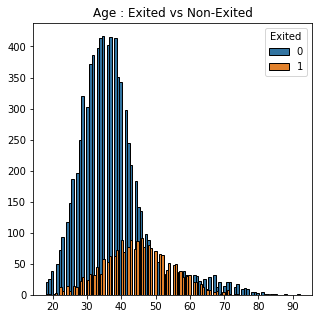

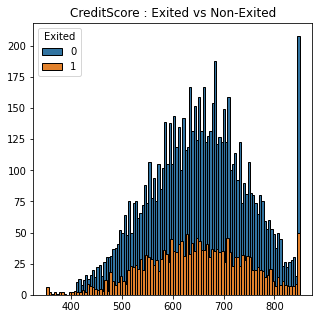

In [ ]:
df_exited=data[data['Exited']==1]
df_not_exited=data[data['Exited']==0]
Excepted_col=['Age','CreditScore']
for column in Excepted_col:
    plt.figure(figsize=(5,5))
    plt.hist(x=column,bins=100,data=df_not_exited,edgecolor='black',color='#3274a1')
    plt.hist(x=column,bins=100,data=df_exited,edgecolor='black',color='#e1812c')
    plt.title(column+' : Exited vs Non-Exited')
    plt.legend([0,1],title='Exited')

In [ ]:
df_encoded = pd.get_dummies(data, columns=['Geography', 'Gender'],drop_first=True)
df_encoded.head(10)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0
5,645,44,8,113755.78,2,1,0,149756.71,1,0,1,1
6,822,50,7,0.00,2,1,1,10062.80,0,0,0,1
7,376,29,4,115046.74,4,1,0,119346.88,1,1,0,0
8,501,44,4,142051.07,2,0,1,74940.50,0,0,0,1
9,684,27,2,134603.88,1,1,1,71725.73,0,0,0,1


In [ ]:
cols_to_scale = ['CreditScore','Age','Tenure','Balance','EstimatedSalary']
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_encoded[cols_to_scale] = scaler.fit_transform(df_encoded[cols_to_scale])

In [ ]:
for col in df_encoded:
    print(f'{col}: {df_encoded[col].unique()}')

CreditScore: [0.538 0.516 0.304 0.698 1.    0.59  0.944 0.052 0.302 0.668 0.356 0.294
 0.252 0.398 0.57  0.532 0.606 0.474 0.752 0.764 0.572 0.32  0.638 0.992
 0.454 0.812 0.442 0.448 0.122 0.482 0.366 0.406 0.34  0.744 0.25  0.28
 0.908 0.464 0.244 0.23  0.412 0.968 0.62  0.852 0.958 0.574 0.4   0.696
 0.47  0.876 0.61  0.502 0.612 0.75  0.322 0.528 0.784 0.674 0.41  0.506
 0.802 0.462 0.77  0.622 0.65  0.776 0.926 0.614 0.508 0.338 0.628 0.656
 0.814 0.132 0.63  0.854 0.386 0.312 0.286 0.604 0.8   0.758 0.592 0.594
 0.916 0.348 0.838 0.76  0.33  0.846 0.928 0.72  0.126 0.546 0.64  0.544
 0.87  0.51  0.258 0.67  0.376 0.424 0.742 0.556 0.636 0.956 0.648 0.55
 0.164 0.84  0.816 0.89  0.672 0.878 0.478 0.222 0.468 0.458 0.626 0.664
 0.886 0.682 0.27  0.6   0.808 0.37  0.732 0.378 0.712 0.472 0.562 0.734
 0.9   0.666 0.708 0.53  0.634 0.268 0.26  0.456 0.324 0.512 0.494 0.856
 0.328 0.35  0.73  0.46  0.914 0.342 0.818 0.332 0.722 0.536 0.586 0.642
 0.678 0.54  0.652 0.444 0.69  0.484 0.4

In [ ]:
X = df_encoded.drop('Exited',axis='columns')
y = df_encoded['Exited']

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X, y)

#y_sm.value_counts()
X_sm.head(5)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,0.538,0.324324,0.2,0.000000,1,1,1,0.506735,0,0,0
1,0.516,0.310811,0.1,0.334031,1,0,1,0.562709,0,1,0
2,0.304,0.324324,0.8,0.636357,3,1,0,0.569654,0,0,0
3,0.698,0.283784,0.1,0.000000,2,0,0,0.469120,0,0,0
4,1.000,0.337838,0.2,0.500246,1,1,1,0.395400,0,1,0


In [ ]:
X_sm.shape

(15926, 11)

In [ ]:
y_sm.shape

(15926,)

In [ ]:
df_bal_smote = pd.concat([X_sm, y_sm], axis=1)
df_bal_smote.head(10)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male,Exited
0,0.538,0.324324,0.2,0.000000,1,1,1,0.506735,0,0,0,1
1,0.516,0.310811,0.1,0.334031,1,0,1,0.562709,0,1,0,0
2,0.304,0.324324,0.8,0.636357,3,1,0,0.569654,0,0,0,1
3,0.698,0.283784,0.1,0.000000,2,0,0,0.469120,0,0,0,0
4,1.000,0.337838,0.2,0.500246,1,1,1,0.395400,0,1,0,0
5,0.590,0.351351,0.8,0.453394,2,1,0,0.748797,0,1,1,1
6,0.944,0.432432,0.7,0.000000,2,1,1,0.050261,0,0,1,0
7,0.052,0.148649,0.4,0.458540,4,1,0,0.596733,1,0,0,1
8,0.302,0.351351,0.4,0.566170,2,0,1,0.374680,0,0,1,0
9,0.668,0.121622,0.2,0.536488,1,1,1,0.358605,0,0,1,0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


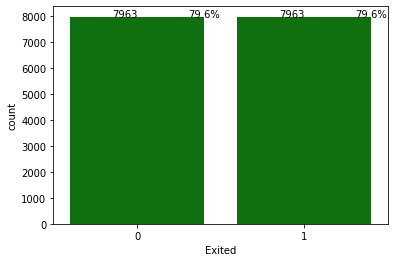

In [ ]:
#plotting again the balanced dataset
ax=sns.countplot(df_bal_smote['Exited'],color="Green")
for p in ax.patches:
    percent = '{:.1f}%'.format(100 * p.get_height()/total)
    x=p.get_x() + p.get_width()
    y=p.get_height()
    ax.annotate(percent,(x,y),ha='center')
    ax.annotate(y, (x - + p.get_width() +0.25, y+0.01))
plt.show()

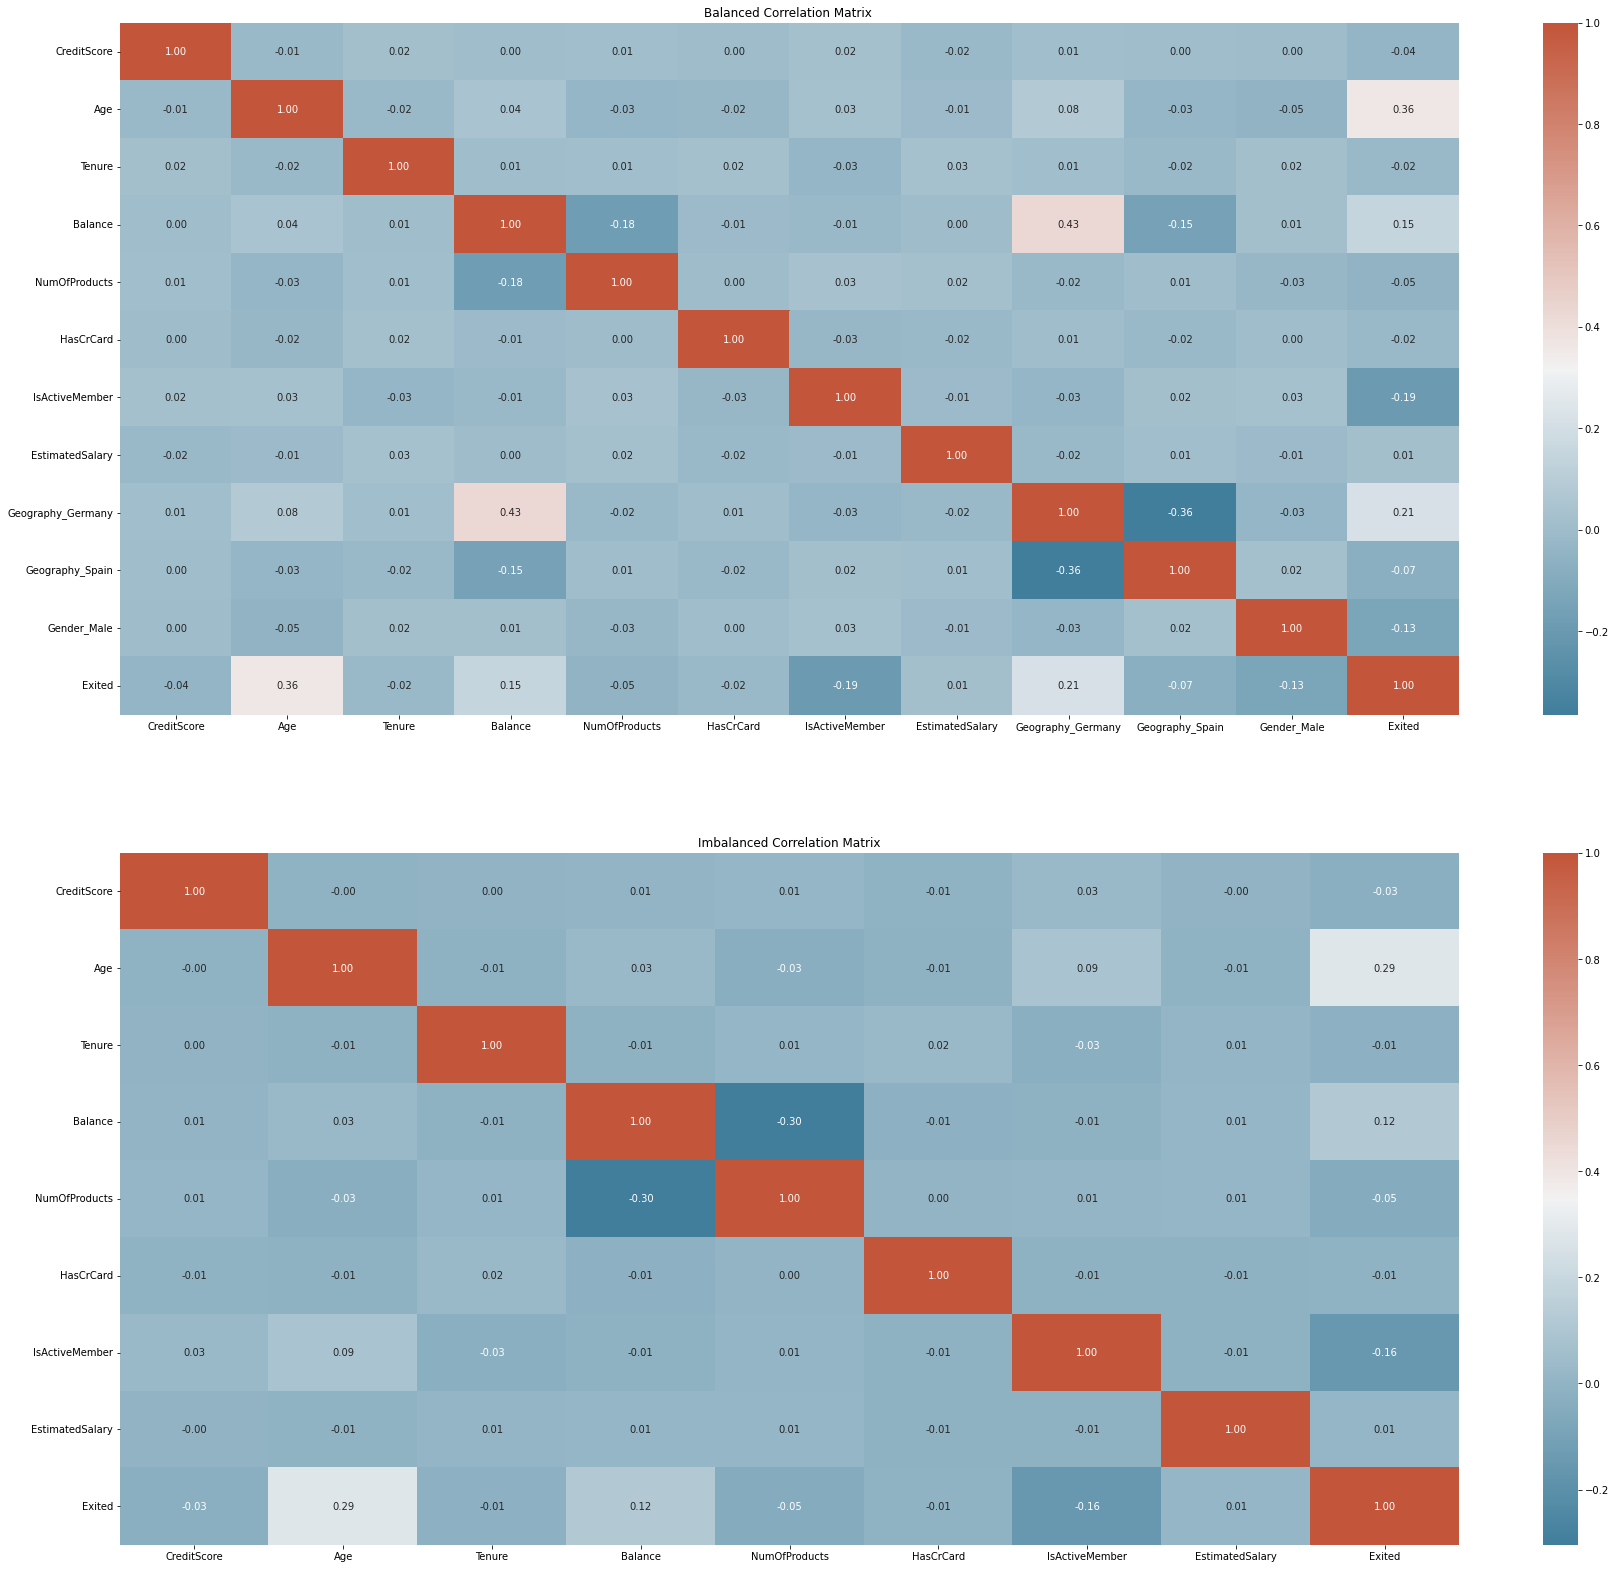

In [ ]:
fig, axes = plt.subplots(2, 1, figsize=(30,28))

cmap=sns.diverging_palette(230,20,as_cmap=True)

sns.heatmap(df_bal_smote.corr(), annot=True, fmt=".2f", cmap = cmap, ax=axes[0])
axes[0].set_title("Balanced Correlation Matrix ",fontweight='light')

sns.heatmap(data.corr(), annot=True, fmt=".2f", cmap = cmap, ax=axes[1])
axes[1].set_title('Imbalanced Correlation Matrix', fontweight='light')

plt.show()


[]

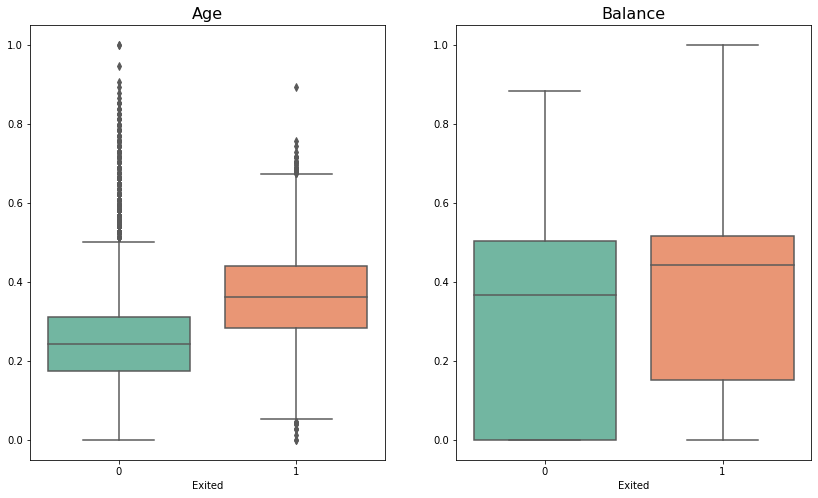

In [ ]:
#check for outliers in influenced features
fig, axes = plt.subplots(1,2,figsize=(14,8))

high_correlation = ['Age', 'Balance']

for i, ax in enumerate(axes.flatten()):
    if i == 5:
        ax.axis('off')
        break
    sns.boxplot(x='Exited', y=high_correlation[i], data=df_bal_smote, ax=ax, palette=sns.color_palette('Set2', 2))
    ax.set_ylabel(None)
    ax.set_title(label=high_correlation[i], fontsize=16, fontweight='light')
plt.plot()

In [ ]:
v_fraud = df_bal_smote[df_bal_smote['Exited']==1]['Age']

q75 = np.percentile(v_fraud, 75)
q25 = np.percentile(v_fraud, 25)
iqr = q75 - q25

v_lower, v_upper = q25-1.5*iqr, q75+1.5*iqr
outliers = [x for x in v_fraud if x > v_upper or x < v_lower]

print(str(len(outliers))+' '+str('Age')+' fraud outliers: '+str(outliers)+'\n')

df_bal_smote = df_bal_smote.drop(df_bal_smote.index[df_bal_smote['Age'].isin(outliers) & 
                                 df_bal_smote['Exited']==1])

46 Age fraud outliers: [0.6891891891891893, 0.040540540540540515, 0.7432432432432432, 0.02702702702702703, 0.0, 0.7162162162162162, 0.02702702702702703, 0.7567567567567568, 0.7162162162162162, 0.8918918918918919, 0.7027027027027029, 0.7027027027027029, 0.013513513513513542, 0.6756756756756757, 0.7027027027027029, 0.6756756756756757, 0.6756756756756757, 0.7162162162162162, 0.7162162162162162, 0.7162162162162162, 0.040540540540540515, 0.7162162162162162, 0.6756756756756757, 0.6756756756756757, 0.040540540540540515, 0.6756756756756757, 0.7027027027027029, 0.7297297297297298, 0.0, 0.7162162162162162, 0.6891891891891893, 0.6958957265859557, 0.6809545605830836, 0.691288767062925, 0.6834725220758975, 0.7005835902392034, 0.04653718547715112, 0.7063737680654484, 0.04490206054367766, 0.6850339846939962, 0.6880261673787004, 0.045153345580485574, 0.7008880343985915, 0.6836663577234047, 0.6844858607834952, 0.027547304469616174]



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


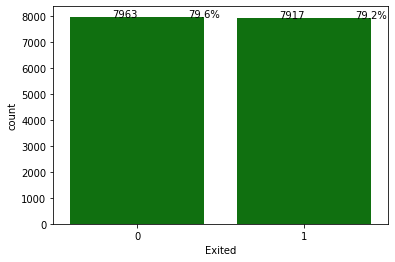

In [ ]:
#plotting again the balanced dataset after removing outliers
ax=sns.countplot(df_bal_smote['Exited'],color="Green")
for p in ax.patches:
    percent = '{:.1f}%'.format(100 * p.get_height()/total)
    x=p.get_x() + p.get_width()
    y=p.get_height()
    ax.annotate(percent,(x,y),ha='center')
    ax.annotate(y, (x - + p.get_width() +0.25, y+0.01))
plt.show()

In [ ]:
X = df_bal_smote.drop('Exited',axis='columns')
y = df_bal_smote['Exited']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

People in France haven't exited as much as the other countries. Females exit more than males. Customers who use more than 2 products are less possible to exit. A great portion of inactive members exit. Most of the customers who exit have a credit card

In [ ]:
y_train.value_counts()

0    6370
1    6334
Name: Exited, dtype: int64

In [ ]:
#Function for Confusion Matrix plot
def plot_confusionmat(cm, lab, test_or_train):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    f = ax.matshow(cm, cmap=plt.cm.Pastel1)
    plt.title('Confusion Matrix of the ' + test_or_train +' Decision Tree \n')
    fig.colorbar(f)
    ax.set_xticklabels([''] + lab)
    ax.set_yticklabels([''] + lab)
    plt.xlabel('Predicted Values')
    plt.ylabel('True Values')
    s = [['TP','FN'], ['FP', 'TN']]
    for k in range(2):
        for l in range(2):
            plt.text(l,k, str(cm[k][l]))
    plt.show()
 

**Multivariate** **Analysis**

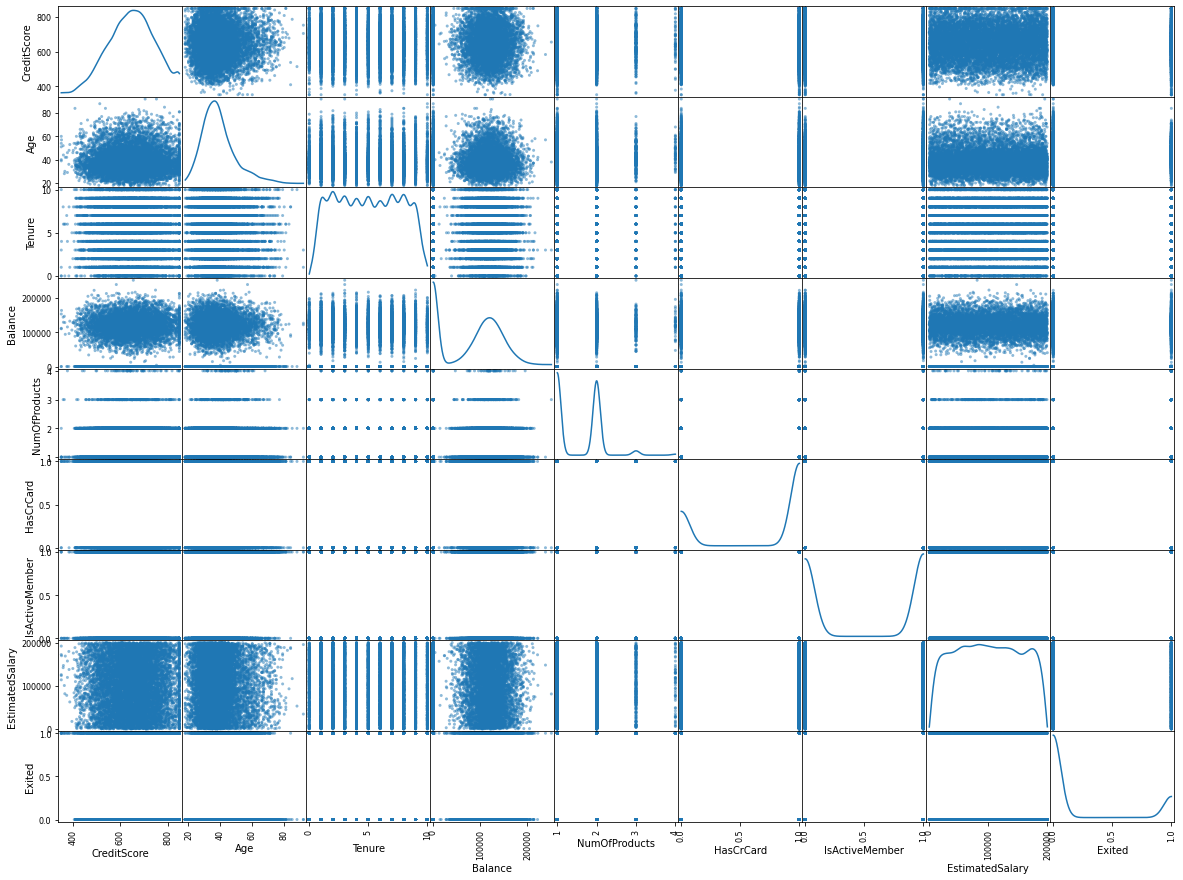

In [ ]:
pd.plotting.scatter_matrix(data.loc[:, "CreditScore":"Exited"], diagonal="kde",figsize=(20,15))
plt.show()

DESCRIPTIVE STATISTICS

In [ ]:
print (data.describe())

         RowNumber    CustomerId   CreditScore           Age        Tenure  \
count  10000.00000  1.000000e+04  10000.000000  10000.000000  10000.000000   
mean    5000.50000  1.569094e+07    650.528800     38.921800      5.012800   
std     2886.89568  7.193619e+04     96.653299     10.487806      2.892174   
min        1.00000  1.556570e+07    350.000000     18.000000      0.000000   
25%     2500.75000  1.562853e+07    584.000000     32.000000      3.000000   
50%     5000.50000  1.569074e+07    652.000000     37.000000      5.000000   
75%     7500.25000  1.575323e+07    718.000000     44.000000      7.000000   
max    10000.00000  1.581569e+07    850.000000     92.000000     10.000000   

             Balance  NumOfProducts    HasCrCard  IsActiveMember  \
count   10000.000000   10000.000000  10000.00000    10000.000000   
mean    76485.889288       1.530200      0.70550        0.515100   
std     62397.405202       0.581654      0.45584        0.499797   
min         0.000000     

MISSING VALUES

In [ ]:
data.isnull()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9996,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9997,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9998,False,False,False,False,False,False,False,False,False,False,False,False,False,False


There are no null values found, however still implementing the following line of code to deal with them. 

In [ ]:
data = data.dropna(axis = 0, how ='any')

FINDING OUTLIERS, CATEGORICAL COLUMNS, PERFORMING ENCODING

In [42]:
df_encoded = pd.get_dummies(data, columns=['Geography', 'Gender'],drop_first=True)
df_encoded.head(10)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0
5,645,44,8,113755.78,2,1,0,149756.71,1,0,1,1
6,822,50,7,0.00,2,1,1,10062.80,0,0,0,1
7,376,29,4,115046.74,4,1,0,119346.88,1,1,0,0
8,501,44,4,142051.07,2,0,1,74940.50,0,0,0,1
9,684,27,2,134603.88,1,1,1,71725.73,0,0,0,1


In [43]:
X = df_encoded.drop('Exited',axis='columns')
y = df_encoded['Exited']

In [44]:
import seaborn as sns
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X, y)

#y_sm.value_counts()
X_sm.head(5)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


In [45]:
df_bal_smote = pd.concat([X_sm, y_sm], axis=1)
df_bal_smote.head(10)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male,Exited
0,619,42,2,0.00,1,1,1,101348.88,0,0,0,1
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0,1
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0,0
5,645,44,8,113755.78,2,1,0,149756.71,0,1,1,1
6,822,50,7,0.00,2,1,1,10062.80,0,0,1,0
7,376,29,4,115046.74,4,1,0,119346.88,1,0,0,1
8,501,44,4,142051.07,2,0,1,74940.50,0,0,1,0
9,684,27,2,134603.88,1,1,1,71725.73,0,0,1,0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


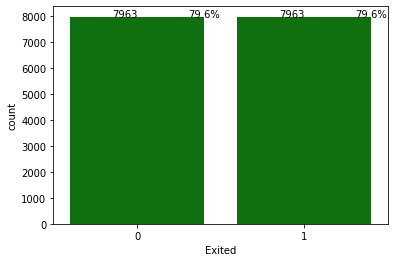

In [46]:
ax=sns.countplot(df_bal_smote['Exited'],color="Green")
for p in ax.patches:
    percent = '{:.1f}%'.format(100 * p.get_height()/total)
    x=p.get_x() + p.get_width()
    y=p.get_height()
    ax.annotate(percent,(x,y),ha='center')
    ax.annotate(y, (x - + p.get_width() +0.25, y+0.01))
plt.show()

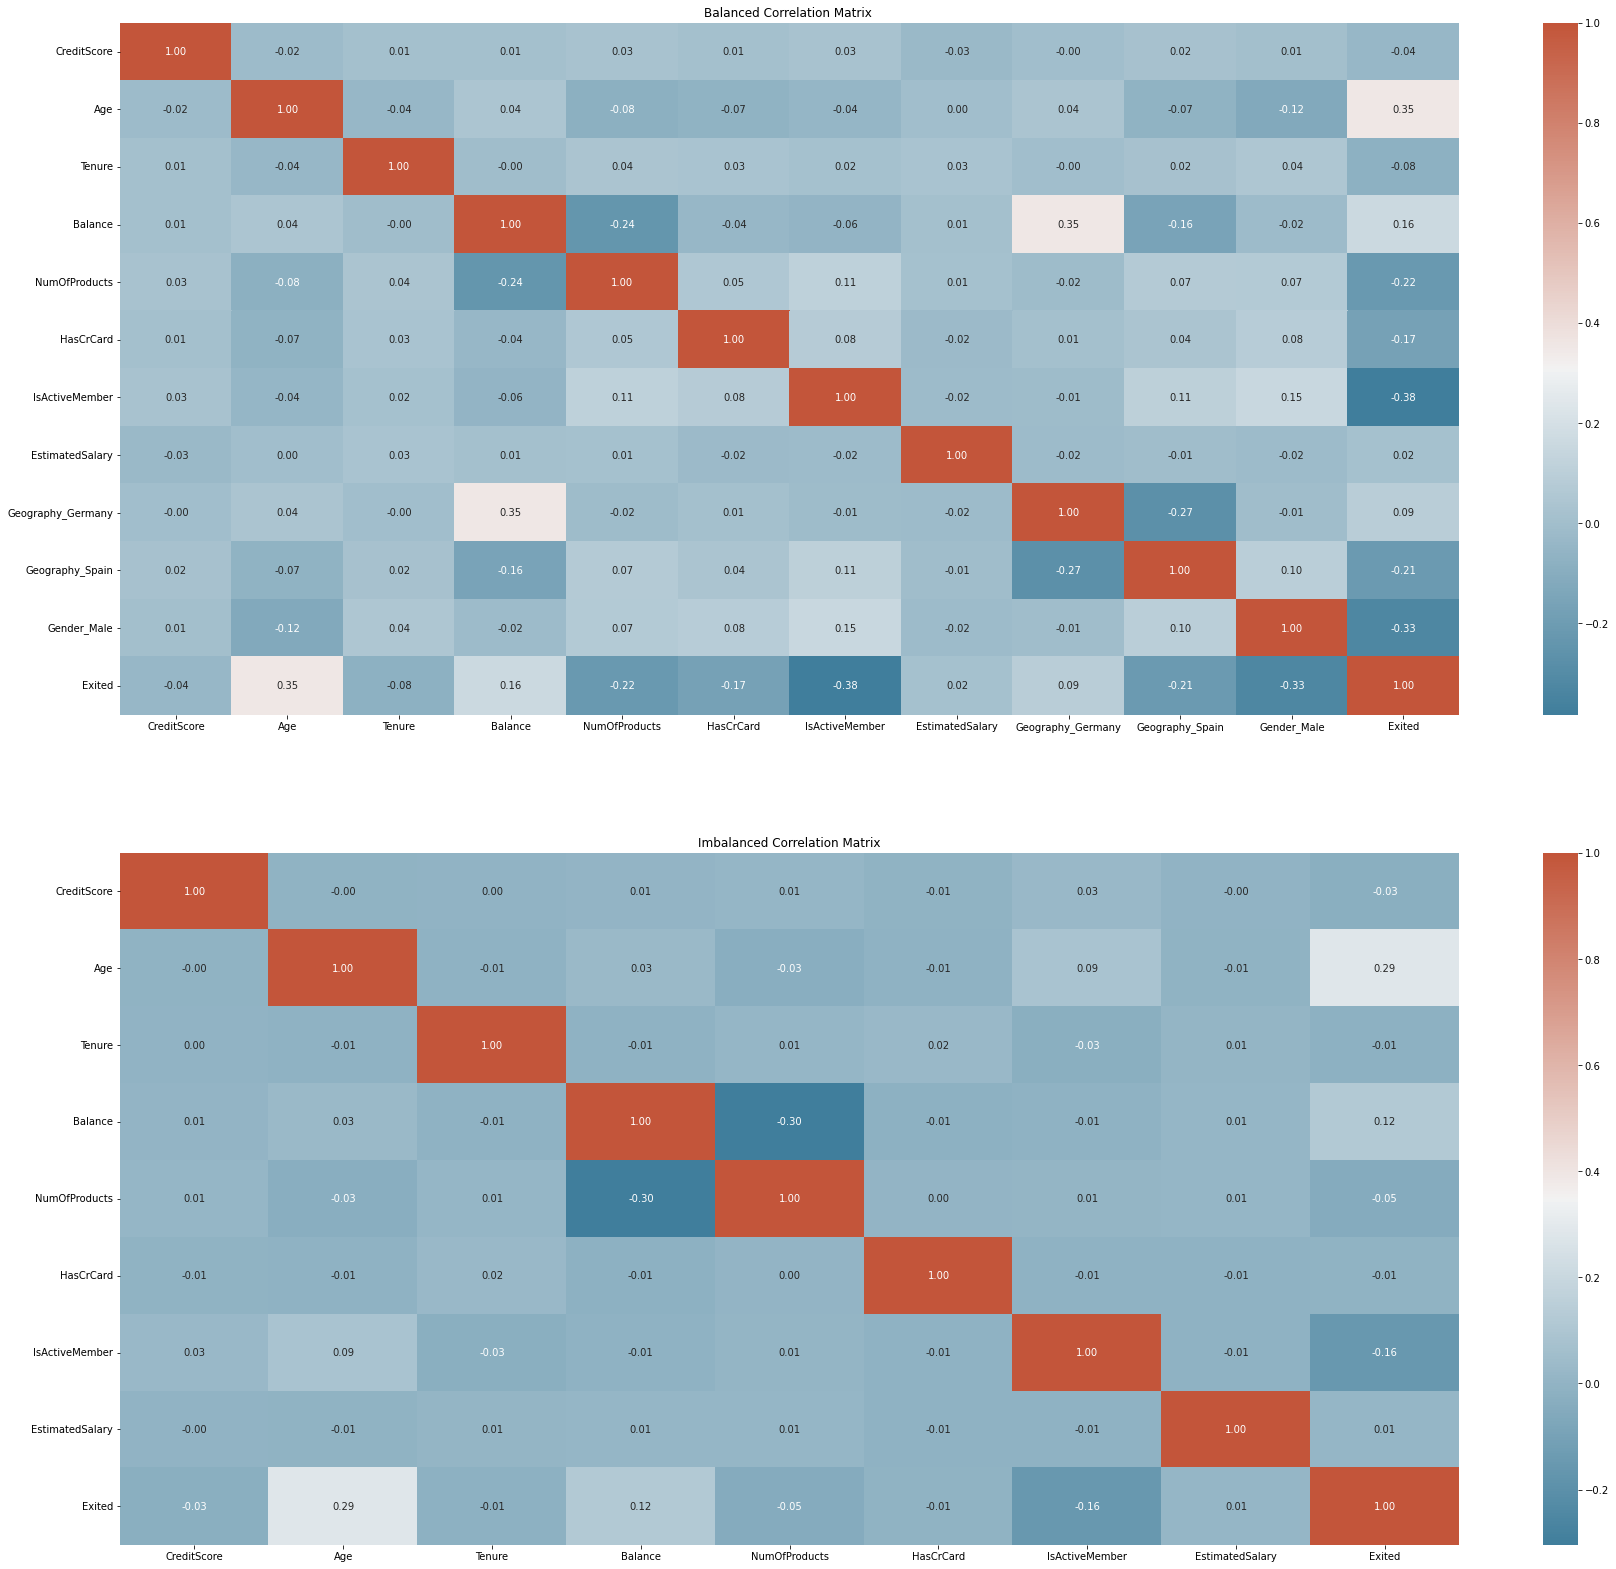

In [47]:
fig, axes = plt.subplots(2, 1, figsize=(30,28))

cmap=sns.diverging_palette(230,20,as_cmap=True)

sns.heatmap(df_bal_smote.corr(), annot=True, fmt=".2f", cmap = cmap, ax=axes[0])
axes[0].set_title("Balanced Correlation Matrix ",fontweight='light')

sns.heatmap(data.corr(), annot=True, fmt=".2f", cmap = cmap, ax=axes[1])
axes[1].set_title('Imbalanced Correlation Matrix', fontweight='light')

plt.show()

As Age and Balance show positive correlation with class we consider these features as influencers.

Performing Outlier analysis

[]

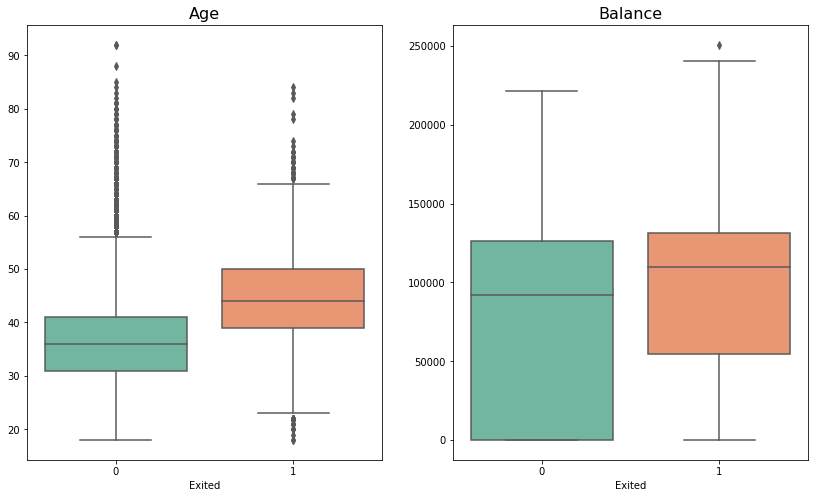

In [48]:
fig, axes = plt.subplots(1,2,figsize=(14,8))

high_correlation = ['Age', 'Balance']

for i, ax in enumerate(axes.flatten()):
    if i == 5:
        ax.axis('off')
        break
    sns.boxplot(x='Exited', y=high_correlation[i], data=df_bal_smote, ax=ax, palette=sns.color_palette('Set2', 2))
    ax.set_ylabel(None)
    ax.set_title(label=high_correlation[i], fontsize=16, fontweight='light')
plt.plot()

Deleting the outliers

In [50]:
import numpy as np

In [51]:
v_fraud = df_bal_smote[df_bal_smote['Exited']==1]['Age']

q75 = np.percentile(v_fraud, 75)
q25 = np.percentile(v_fraud, 25)
iqr = q75 - q25

v_lower, v_upper = q25-1.5*iqr, q75+1.5*iqr
outliers = [x for x in v_fraud if x > v_upper or x < v_lower]

print(str(len(outliers))+' '+str('Age')+' fraud outliers: '+str(outliers)+'\n')

df_bal_smote = df_bal_smote.drop(df_bal_smote.index[df_bal_smote['Age'].isin(outliers) & 
                                 df_bal_smote['Exited']==1])

87 Age fraud outliers: [22, 67, 69, 21, 73, 20, 22, 22, 18, 22, 71, 22, 20, 74, 71, 84, 70, 70, 19, 68, 70, 22, 68, 22, 68, 71, 22, 22, 67, 71, 22, 71, 21, 71, 68, 67, 68, 67, 21, 68, 22, 22, 70, 67, 72, 18, 71, 69, 83, 22, 22, 72, 68, 67, 22, 69, 67, 69, 70, 68, 68, 67, 70, 22, 69, 78, 69, 72, 68, 68, 21, 20, 67, 68, 67, 70, 67, 72, 70, 69, 22, 22, 69, 69, 79, 82, 68]



Splitting data into dependent and independent

In [53]:
X = df_bal_smote.drop('Exited',axis='columns')
y = df_bal_smote['Exited']

Splitting data into training and testing

In [54]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)